In [ ]:
import math
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
from scipy import sparse
from PIL import Image



# Name: Nainish Tickoo
# Roll No: 2011096
# Batch: 20
# 4th Year Int Msc.

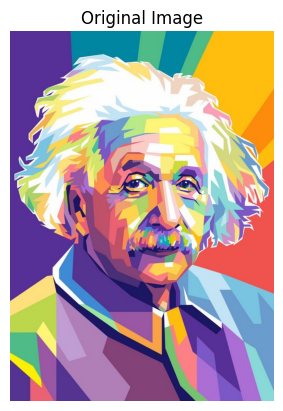

In [ ]:
x = '/content/nnnn.jpg'
# open the image
original_image = Image.open(x)
plt.imshow(original_image)
plt.axis('off')
plt.title("Original Image")
plt.show()






(-0.5, 513.5, 719.5, -0.5)

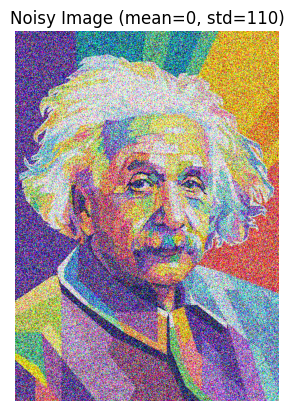

In [ ]:
def make_noisy_image_matrix(image, m=0, std=4):
    n= np.random.normal(m, std, image.shape)
    noisy_image_matrix = np.clip(image + n, 0, 255).astype(np.uint8)
    return noisy_image_matrix


original_image_array = np.array(original_image)

# Add controlled Gaussian noise to the image with mean=0 and std=25
noisy_image = make_noisy_image_matrix(original_image_array, m=0, std=110)
noisy_image_pil = Image.fromarray(noisy_image)

plt.imshow(noisy_image_pil)
plt.title("Noisy Image (mean=0, std=110)")
plt.axis('off')


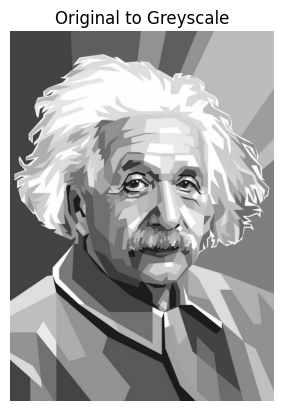

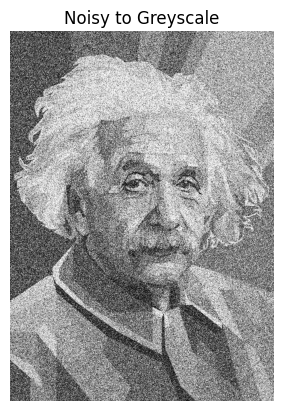

In [ ]:
# coverting the image to greyscale
greyscale_image = original_image.convert('L')
plt.imshow(greyscale_image, cmap='gray')
plt.title("Original to Greyscale")
plt.axis('off')
plt.show()

print('')

noisy_greyscale_image = noisy_image_pil.convert('L')
plt.imshow(noisy_greyscale_image, cmap='gray')
plt.title("Noisy to Greyscale")
plt.axis('off')
plt.show()

In [ ]:
#convert the greyscale image to a matrix
greyscale_image_matrix = np.array(greyscale_image)
print(greyscale_image_matrix)
#it forms a 720 x 514 matrix
print('')
#plt.imshow(greyscale_image_matrix, cmap='gray')
noisy_greyscale_image_matrix = np.array(noisy_greyscale_image)
print(noisy_greyscale_image_matrix)

[[ 71  71  71 ... 189 189 189]
 [ 71  71  71 ... 189 189 189]
 [ 71  71  71 ... 189 189 189]
 ...
 [ 72  72  72 ... 193 193 193]
 [ 72  72  72 ... 193 193 193]
 [ 72  72  72 ... 193 193 193]]

[[ 56  81 120 ... 157 170 252]
 [ 76  25  25 ... 225 186 106]
 [134  36 214 ...  52 232  76]
 ...
 [ 68 161 101 ... 187 134 137]
 [ 34  85 103 ... 177 255 106]
 [177  15  83 ... 153 239 146]]


In [ ]:
def matrix_norm(A):
    min = np.min(A)
    max = np.max(A)
    A_norm = (A - min) / (max - min)
    return A_norm


norm_greyscale = matrix_norm(greyscale_image_matrix)
print(norm_greyscale)
print('')
norm_noisy_greyscale = matrix_norm(noisy_greyscale_image_matrix)
print(norm_noisy_greyscale)
print('')
# plt.imshow(norm_greyscale, cmap='gray')
# plt.axis('off')
# plt.show()
# plt.imshow(norm_noisy_greyscale, cmap='gray')
# plt.axis('off')
# plt.show()

[[0.264 0.264 0.264 ... 0.736 0.736 0.736]
 [0.264 0.264 0.264 ... 0.736 0.736 0.736]
 [0.264 0.264 0.264 ... 0.736 0.736 0.736]
 ...
 [0.268 0.268 0.268 ... 0.752 0.752 0.752]
 [0.268 0.268 0.268 ... 0.752 0.752 0.752]
 [0.268 0.268 0.268 ... 0.752 0.752 0.752]]

[[0.21960784 0.31764706 0.47058824 ... 0.61568627 0.66666667 0.98823529]
 [0.29803922 0.09803922 0.09803922 ... 0.88235294 0.72941176 0.41568627]
 [0.5254902  0.14117647 0.83921569 ... 0.20392157 0.90980392 0.29803922]
 ...
 [0.26666667 0.63137255 0.39607843 ... 0.73333333 0.5254902  0.5372549 ]
 [0.13333333 0.33333333 0.40392157 ... 0.69411765 1.         0.41568627]
 [0.69411765 0.05882353 0.3254902  ... 0.6        0.9372549  0.57254902]]



In [ ]:
from numpy.linalg import svd
U1,S1,V1=svd(norm_noisy_greyscale)
# print(U1)
# print("############################################")
# print(S1)
# print("############################################")
# print(V1)


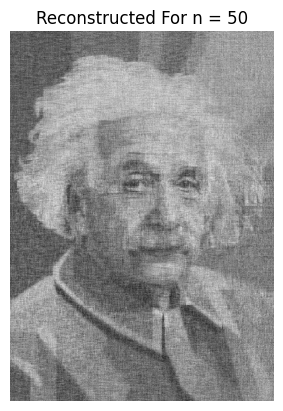

In [ ]:
n =50
images = []

for i in range(0,n):
    images.append(S1[i]*np.outer(U1[:,i],V1[i]))
print('')

sum = 0
for i in range(0,n):
    sum = images[i]+sum
# print(sum)

plt.imshow(sum, cmap='gray')
plt.title("Reconstructed For n = 50")
plt.axis('off')
plt.show()

In [ ]:
#Calculation Of Peak Signal To Noise Ratio:

import numpy as np
import cv2

def psnr(original_image_matrix, change_matrix):

    mse = np.mean((original_image_matrix - change_matrix) ** 2)
    max_pixel = np.max(original_image_matrix)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

    return psnr




# psnr_value = psnr(greyscale_image_matrix,noisy_greyscale_image_matrix)
# print("Peak Signal-to-Noise Ratio (PSNR):", psnr_value, "dB")

psnr_value = psnr(noisy_greyscale_image_matrix,sum)
print("Peak Signal-to-Noise Ratio (PSNR):", psnr_value, "dB")


Peak Signal-to-Noise Ratio (PSNR): 4.157972589202291 dB


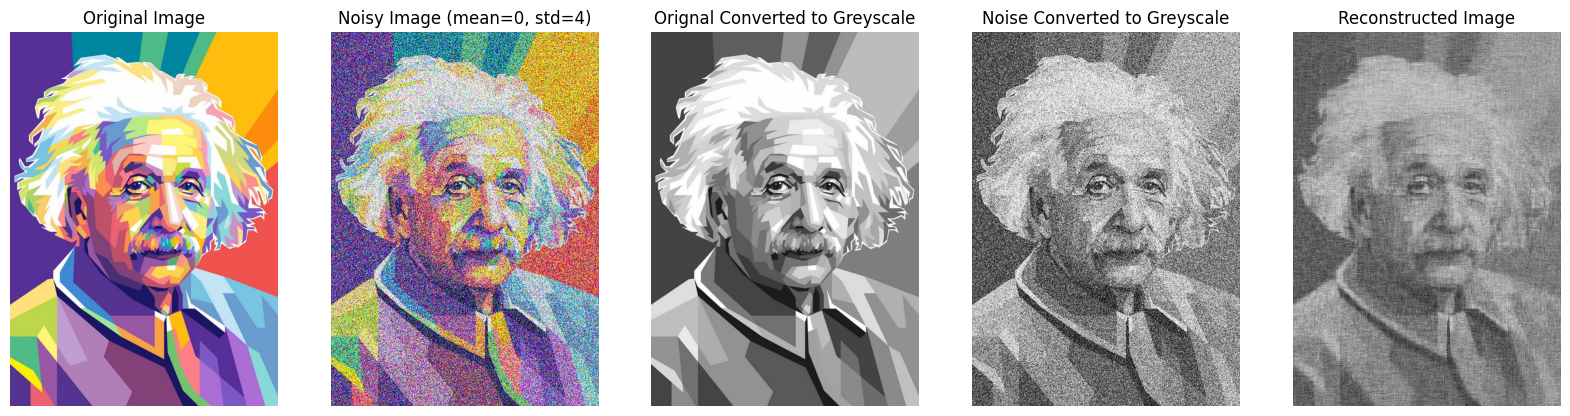

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(1, 5, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(noisy_image_pil)
plt.title('Noisy Image (mean=0, std=4)')
plt.axis('off')



plt.subplot(1, 5, 3)
plt.imshow(norm_greyscale, cmap='gray')
plt.title("Orignal Converted to Greyscale")
plt.axis('off')



plt.subplot(1, 5, 4)
plt.imshow(norm_noisy_greyscale, cmap='gray')
plt.title("Noise Converted to Greyscale")
plt.axis('off')


plt.subplot(1, 5, 5)
plt.imshow(sum, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

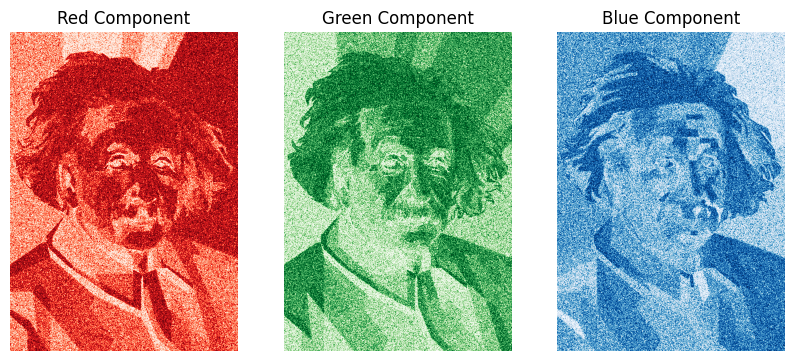

In [ ]:
R,G,B = noisy_image_pil.split()


plt.figure(figsize=(10,7))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds')
plt.title("Red Component")
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title("Green Component")
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues')
plt.title("Blue Component")
plt.axis('off')
plt.show()

In [ ]:
norm_R = matrix_norm(R)

norm_G = matrix_norm(G)

norm_B = matrix_norm(B)




In [ ]:
from numpy.linalg import svd
U_R,S_R,V_R=svd(norm_R)

from numpy.linalg import svd
U_G,S_G,V_G=svd(norm_G)

from numpy.linalg import svd
U_B,S_B,V_B=svd(norm_B)

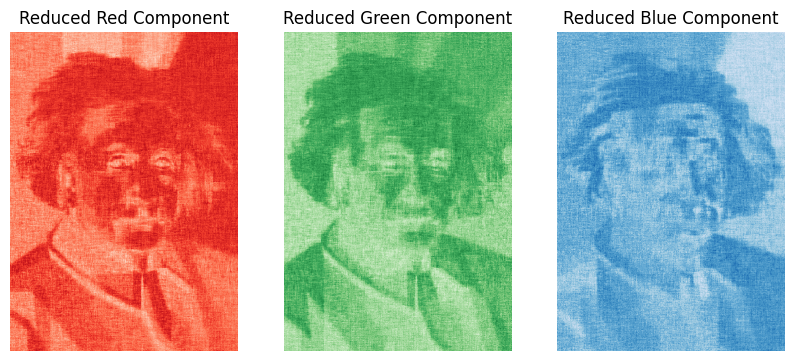

In [ ]:
n =  45
images_R = []
images_G = []
images_B = []
for i in range(0,n):
    images_R.append(S_R[i]*np.outer(U_R[:,i],V_R[i]))
    images_G.append(S_G[i]*np.outer(U_G[:,i],V_G[i]))
    images_B.append(S_B[i]*np.outer(U_B[:,i],V_B[i]))
print('')

sum_R = 0
sum_G = 0
sum_B = 0
for i in range(0,n):
    sum_R = images_R[i]+sum_R
    sum_G = images_G[i]+sum_G
    sum_B = images_B[i]+sum_B




plt.figure(figsize=(10,8))

plt.subplot(1, 3, 1)
plt.imshow(sum_R, cmap='Reds')
plt.title("Reduced Red Component")
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(sum_G, cmap='Greens')
plt.title("Reduced Green Component")
plt.axis('off')



plt.subplot(1, 3, 3)
plt.imshow(sum_B, cmap='Blues')
plt.title("Reduced Blue Component")
plt.axis('off')
plt.show()




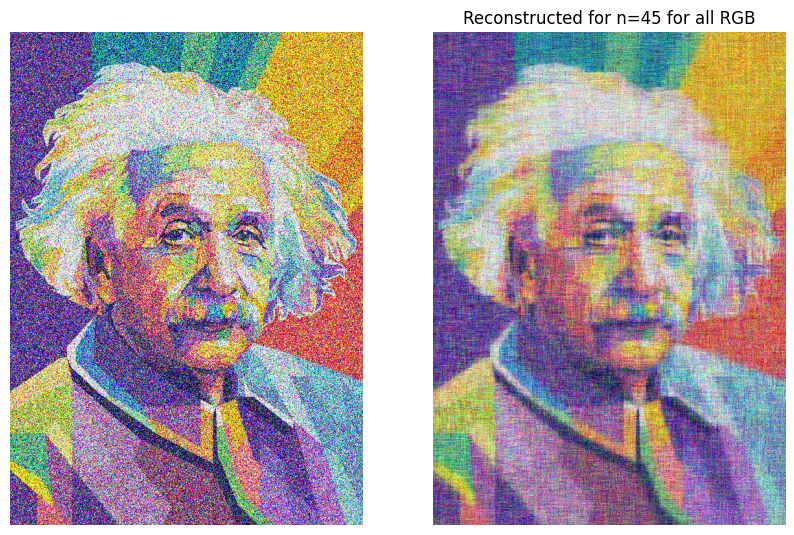

In [ ]:

Final = np.stack((sum_R,sum_G,sum_B), axis=-1)




plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image_pil)
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(Final)
plt.title("Reconstructed for n=45 for all RGB")
plt.axis('off')
plt.show()

In [ ]:
psnr_value = psnr(noisy_image_pil,Final)
print("Peak Signal-to-Noise Ratio (PSNR):", psnr_value, "dB")

Peak Signal-to-Noise Ratio (PSNR): 3.457998747004432 dB


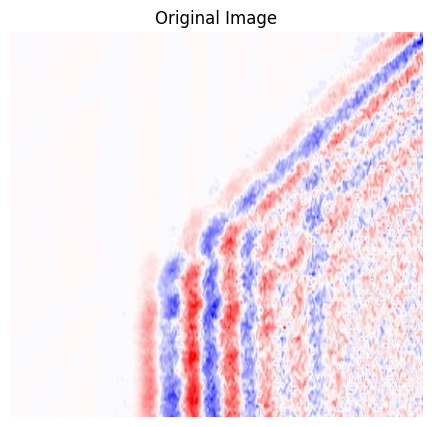

In [ ]:
x = '/content/unnamed.jpg'
# open the image
original_image = Image.open(x)
plt.figure(figsize=(10,5))
plt.imshow(original_image)
plt.axis('off')
plt.title("Original Image")
plt.show()

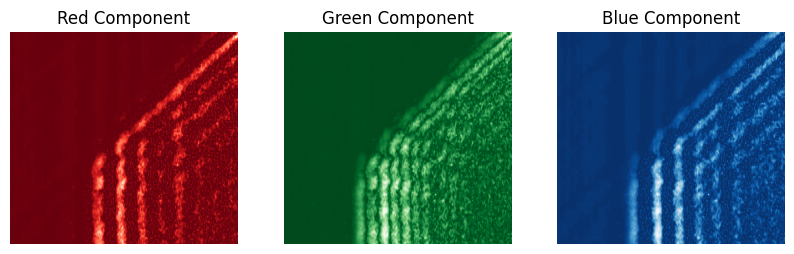

In [ ]:
R,G,B = original_image.split()


plt.figure(figsize=(10,7))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds')
plt.title("Red Component")
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title("Green Component")
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues')
plt.title("Blue Component")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np

def generate_normalized_gaussian_window(n, sigma=1):
    x = np.linspace(-n//2, n//2, n)
    gaussian_array = np.exp(-x**2 / (2 * sigma**2))

    # Normalize the array
    normalized_array = gaussian_array / np.linalg.norm(gaussian_array)

    return normalized_array

# Example usage:

normalized_gaussian_window = generate_normalized_gaussian_window(n)


In [ ]:
def matrix_norm(A):
    min = np.min(A)
    max = np.max(A)
    A_norm = (A - min) / (max - min)
    return A_norm

norm_R = matrix_norm(R)

norm_G = matrix_norm(G)

norm_B = matrix_norm(B)


from numpy.linalg import svd
U_R,S_R,V_R=svd(norm_R)

from numpy.linalg import svd
U_G,S_G,V_G=svd(norm_G)

from numpy.linalg import svd
U_B,S_B,V_B=svd(norm_B)



# gauss_r = generate_normalized_gaussian_window(len(S_R))
# gauss_g = generate_normalized_gaussian_window(len(S_G))
# gauss_b = generate_normalized_gaussian_window(len(S_B))


# S_R = np.multiply(gauss_r, S_R)
# S_G = np.multiply(gauss_b, S_G)
# S_B = np.multiply(gauss_g, S_B)

# S_R = np.multiply(np.linspace(1, 0,len(S_R)), S_R)
# S_G = np.multiply(np.linspace(1, 0,len(S_R)), S_G)
# S_B = np.multiply(np.linspace(1, 0,len(S_R)), S_B)




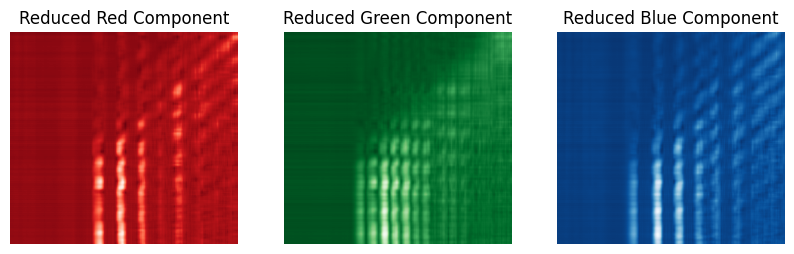

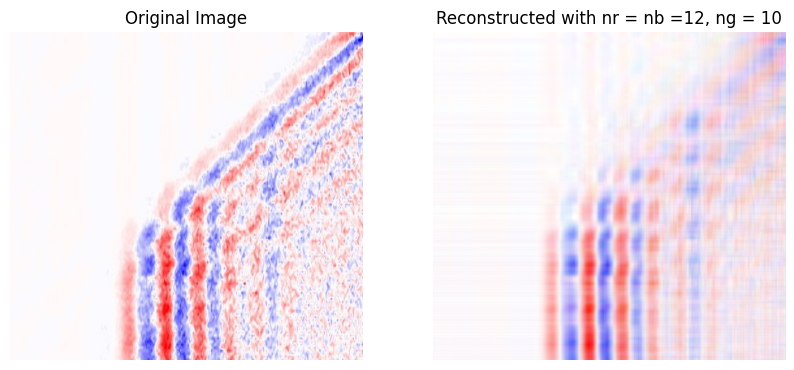

In [ ]:
nr = 12
ng = 10
nb = 12

coeff = np.linspace(1, 0,nr)
# S_R = np.multiply(np.linspace(1, 0,len(S_R)), S_R)
# S_G = np.multiply(np.linspace(1, 0,len(S_R)), S_G)
# S_B = np.multiply(np.linspace(1, 0,len(S_R)), S_B)



images_R = []
images_G = []
images_B = []
for i in range(0,nr):
    images_R.append(coeff[i]*S_R[i]*np.outer(U_R[:,i],V_R[i]))
print('')


coeff = np.linspace(1, 0,ng)
for i in range(0,ng):
    images_G.append(coeff[i]*S_G[i]*np.outer(U_G[:,i],V_G[i]))
print('')


coeff = np.linspace(1, 0,nb)
for i in range(0,nb):
    images_B.append(coeff[i]*S_B[i]*np.outer(U_B[:,i],V_B[i]))
print('')


sum_R = 0
sum_G = 0
sum_B = 0
for i in range(0,nr):
    sum_R = images_R[i]+sum_R

for i in range(0,ng):
    sum_G = images_G[i]+sum_G
for i in range(0,nb):
    sum_B = images_B[i]+sum_B




plt.figure(figsize=(10,7))

plt.subplot(1, 3, 1)
plt.imshow(sum_R, cmap='Reds')
plt.title("Reduced Red Component")
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(sum_G, cmap='Greens')
plt.title("Reduced Green Component")
plt.axis('off')



plt.subplot(1, 3, 3)
plt.imshow(sum_B, cmap='Blues')
plt.title("Reduced Blue Component")
plt.axis('off')
plt.show()


Final2 = np.stack((sum_R,sum_G,sum_B), axis=-1)




plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(Final2)
plt.title("Reconstructed with nr = nb =12, ng = 10")
plt.axis('off')
plt.show()